# Creating way to compare predictions of recidivism to actual recidivism
## This defined a prediction as a decile score > than 5.
## Obviously it's not as definite as that.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

import warnings
warnings.simplefilter("ignore")

In [3]:
compas = pd.read_csv("Compas.csv")

compas

,Unnamed: 0,id,first,last,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,v_decile_score,v_score_text,decile_score.1,score_text
0,0,1,miguel,hernandez,Male,69,Greater than 45,Other,0,1,0,0,0,0,0,1,Low,1,Low
1,1,2,michael,ryan,Male,31,25 - 45,Caucasian,0,5,0,0,0,-1,0,2,Low,5,Medium
2,2,3,kevon,dixon,Male,34,25 - 45,African-American,0,3,0,0,0,1,1,1,Low,3,Low
3,3,4,ed,philo,Male,24,Less than 25,African-American,0,4,0,1,4,1,0,3,Low,4,Low
4,4,5,marcu,brown,Male,23,Less than 25,African-American,0,8,1,0,1,0,0,6,Medium,8,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11752,11752,11753,patrick,hamilton,Male,47,Greater than 45,Other,0,3,0,0,1,0,0,1,Low,3,Low
11753,11753,11754,raymond,hernandez,Male,22,Less than 25,Caucasian,0,7,3,5,3,1,0,5,Medium,7,Medium
11754,11754,11755,dieuseul,pierre-gilles,Male,35,25 - 45,Other,0,4,0,0,0,0,0,3,Low,4,Low
11755,11755,11756,scott,lomagistro,Male,29,25 - 45,Caucasian,0,3,0,0,2,0,0,2,Low,3,Low


In [4]:
# Isolating Black men
compasblackpredict = compas[(compas.race == "African-American")&(compas.sex == "Male")]

compasblackpredict = compasblackpredict[["is_recid", "decile_score"]]
# Taking out unknowns
compasblackpredict = compasblackpredict[(compasblackpredict.is_recid != -1)]
compasblackpredict

,is_recid,decile_score
2,1,3
3,1,4
4,0,8
14,1,6
17,0,4
...,...,...
11737,1,9
11744,0,4
11746,1,4
11749,0,1


In [5]:
# Showing those predicted to recid (decile > 5)
Bllikely = (compasblackpredict[compasblackpredict.decile_score > 5]).decile_score.count()
Bllikely

2268

In [6]:
# Showing actual recid
recid = compasblackpredict.is_recid.sum()
recid

1883

In [7]:
Bllikely/recid

1.204460966542751

In [8]:
# Isolating White men
compaswhitepredict = compas[(compas.race == "Caucasian") &(compas.sex == "Male")]

compaswhitepredict = compaswhitepredict[["is_recid","decile_score"]]
# Taking out unknowns
compaswhitepredict = compaswhitepredict[(compaswhitepredict.is_recid != -1)]
compaswhitepredict.head()

,is_recid,decile_score
7,1,6
10,0,10
12,1,3
13,0,4
16,0,3


In [9]:
#Showing number predicted
Whlikely = (compaswhitepredict[compaswhitepredict.decile_score > 5]).decile_score.count()
Whlikely

665

In [10]:
#Showing number of actual recid
Whrecid = compaswhitepredict.is_recid.sum()
Whrecid

867

In [11]:
#White men are underpredicted
Whlikely/Whrecid

0.7670126874279123

In [12]:
#Creaing dataframe to easily graph
Baggresults = pd.DataFrame({"Race": ["Black Men", "White Men", "Black Men", "White Men", "Black Men", "White Men"],
                   'Data': [recid, Whrecid, Bllikely, round(Whlikely,0), round((1- (Bllikely/recid))*100,2),round((1- (Whlikely/Whrecid))*100,2)],
                   "Metric": ["# of Recidivisms","# of Recidivisms","# With Score > 5","# With Score > 5", "% Error", "% Error"] })
Baggresults

,Race,Data,Metric
0,Black Men,1883.00,# of Recidivisms
1,White Men,867.00,# of Recidivisms
2,Black Men,2268.00,# With Score > 5
3,White Men,665.00,# With Score > 5
4,Black Men,-20.45,% Error
5,White Men,23.30,% Error


[Text(0, 0.5, '# of Convicts'),
 Text(0.5, 0, 'Race'),
 Text(0.5, 1.0, 'Actual Recidivisms vs. Predicted')]

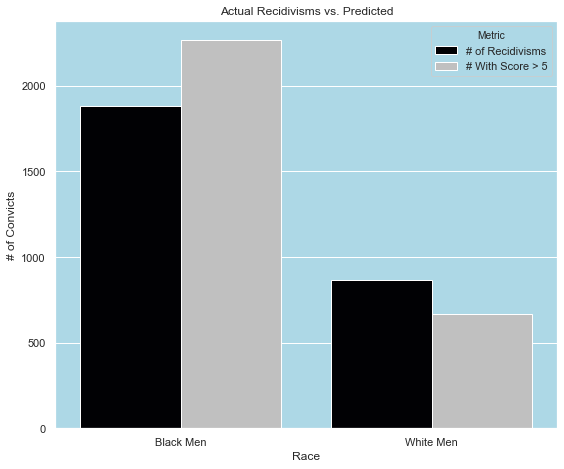

In [13]:
colors = [ "#000005","#C0C0C0" ]
sns.set(rc={'axes.facecolor':'#ADD8E6'})
customPalette = sns.set_palette(sns.color_palette(colors))
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(9,7.5))
fig = sns.barplot(data = Baggresults,x = "Race", y= "Data", hue = "Metric", hue_order = ["# of Recidivisms","# With Score > 5"],  palette=customPalette)
fig.set(xlabel='Race', ylabel='# of Convicts', Title = "Actual Recidivisms vs. Predicted")


In [14]:
Baggresults =Baggresults.groupby(["Race", "Metric"]).mean()

In [15]:
Baggresults = Baggresults.reset_index()
Baggresults

,Race,Metric,Data
0,Black Men,# With Score > 5,2268.00
1,Black Men,# of Recidivisms,1883.00
2,Black Men,% Error,-20.45
3,White Men,# With Score > 5,665.00
4,White Men,# of Recidivisms,867.00
5,White Men,% Error,23.30


In [16]:
list([Baggresults.Data.iloc[4], Baggresults.Data.iloc[5]])

[867.0, 23.3]

In [17]:
# Using data from Drug Possesion, CompasCocaine, and CompasCannabis Notebooks creating a graph to
#compare all 3 discrepancies in predictions
Final = pd.DataFrame({"Offense": ["All Possession Offenses", "All Possession Offenses", "Cocaine Possession", "Cocaine Possession", "Cannabis Possession", "Cannabis Possession"],
                   'Data': [-18.3, 12.32, -18.72, 23.73, -29.17, 17.65],
                   "Metric": ["% Error Black Men","% Error White Men","% Error Black Men", "% Error White Men", "% Error Black Men", "% Error White Men"] })
Final

,Offense,Data,Metric
0,All Possession Offenses,-18.30,% Error Black Men
1,All Possession Offenses,12.32,% Error White Men
2,Cocaine Possession,-18.72,% Error Black Men
3,Cocaine Possession,23.73,% Error White Men
4,Cannabis Possession,-29.17,% Error Black Men
5,Cannabis Possession,17.65,% Error White Men


[Text(0, 0.5, '% Difference'),
 Text(0.5, 0, 'Offense'),
 Text(0.5, 1.0, 'Percent Difference: Actual Recidivisms vs Predicted')]

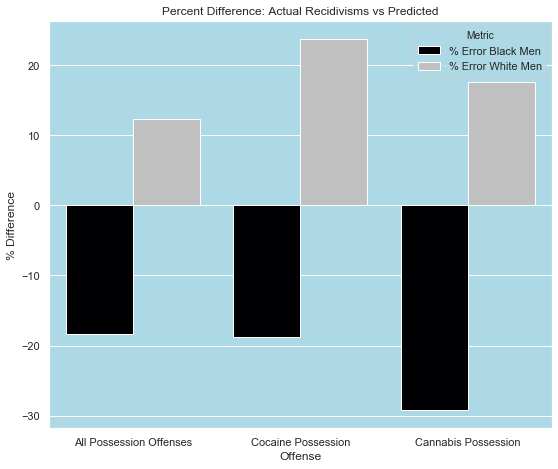

In [20]:
colors = [  "#000005",  "#C0C0C0" ]
sns.set(rc={'axes.facecolor':'#ADD8E6'})
customPalette = sns.set_palette(sns.color_palette(colors))
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(9,7.5))
fig = sns.barplot(data = Final,x = "Offense", y= "Data", hue = "Metric",)
fig.set(xlabel='Offense', ylabel='% Difference', Title = "Percent Difference: Actual Recidivisms vs Predicted")


In [21]:
# Create easy-to-see data table
Final.groupby(["Offense","Metric"]).mean()

Data
Offense                 Metric                  
All Possession Offenses % Error Black Men -18.30
                        % Error White Men  12.32
Cannabis Possession     % Error Black Men -29.17
                        % Error White Men  17.65
Cocaine Possession      % Error Black Men -18.72
                        % Error White Men  23.73